In [1]:
# for loading/processing the images
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [2]:
# Check Python version
import sys
print(f"Python version: {sys.version}")

# Check TensorFlow version
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

# Check Keras version
import keras
print(f"Keras version: {keras.__version__}")

Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
TensorFlow version: 2.17.0
Keras version: 3.4.1


In [4]:
#Dosyaların Drive dan alınması
path = r"/content/drive/MyDrive/CorrectedAll"

# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            flowers.append(file.name)

In [8]:
# removing faulty images
strings_to_remove = {'F20T1_102Left_CorrectedImage.jpg', 'F20T3-201Left_CorrectedImage.jpg'}

flowers = list(filter(lambda x: x not in strings_to_remove, flowers))

In [12]:
# extracting features from images using Transfer Learning
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):

    #crop images resize and load
    img = load_img(file)
    img = img.crop((0,0,img.size[0],img.size[1]-220))
    img = img.resize((224,224))


    # convert from image to numpy array
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx)
    return features

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [62]:
# rigth, left for two-class classification
def get_label(flower):
    if 'ight' in flower:
        return '0'
    elif 'eft' in flower:
        return '1'
    else:
        return '7'

# Create the DataFrame
df = pd.DataFrame({'file': flowers})
df['label'] = df['file'].apply(get_label)

In [32]:
# assigning Labels to Images
def get_label(flower):
    if 'Fresh' in flower:
        return '2'
    elif 'F20T1' in flower:
        return '0'
    elif 'F20T2' in flower:
        return '0'
    elif 'F20T3' in flower:
        return '0'
    elif 'F60T1' in flower:
        return '1'
    elif 'F60-T1' in flower:
        return '1'
    elif 'F60T2' in flower:
        return '1'
    elif 'F60T3' in flower:
        return '1'
    else:
        return '7'

# create the DataFrame
df = pd.DataFrame({'file': flowers})
df['label'] = df['file'].apply(get_label)

In [63]:
labels = df['label'].tolist()

In [64]:
# Count the number of elements in each class
class_counts = df['label'].value_counts()

print(class_counts)

label
0    62
1    61
Name: count, dtype: int64


In [15]:
# extracting features from images using Transfer Learning
data = {}

for flower in flowers:
  feat = extract_features(flower,model)
  data[flower] = feat

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [59]:
# put the extracted features together in an array
filenames = np.array(list(data.keys()))

feat = np.array(list(data.values()))

feat = feat.reshape(-1,4096)

In [68]:
# obtaining PCA components
pca = PCA(n_components=3, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [69]:
# to be used when any class needs to be removed
labels_array = np.array(labels)

indices_to_keep = labels_array != '2'

filtered_features = x[indices_to_keep]
labels = labels_array[indices_to_keep]

In [73]:
labels.shape

(123,)

In [70]:
x.shape

(123, 3)

In [ ]:
x1 = filtered_features[:, 0]
y = filtered_features[:, 1]
z = filtered_features[:, 2]

unique_labels = sorted(set(labels))
custom_label_names = ["Frozen (-20)", "Frozen (-60)"]  # Customize these names as needed
custom_colors = ["blue", "orange"]
custom_markers = ["o", "^"]  # Customize these markers as needed

fig = plt.figure(figsize=(16, 8))

# Second subplot: 2D scatter plot for comparison
ax2 = fig.add_subplot(122)  # 1 row, 2 columns, second subplot
for label, custom_name, color, marker in zip(unique_labels, custom_label_names, custom_colors, custom_markers):
    indices = [i for i, l in enumerate(labels) if l == label]
    ax2.scatter(x1[indices], y[indices], label=custom_name, color=color, marker=marker)

ax2.set_title('2D Scatter Plot of Data with Labels')
ax2.set_xlabel('PC 1')
ax2.set_ylabel('PC 2')
ax2.legend()


#plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.tight_layout()

# Save the plot as a PNG file
#file_name = '/content/drive/MyDrive/FishQuality_images/scatter_plots_20_60.png'
#plt.savefig(file_name, format='png', dpi=300)

plt.show()

In [ ]:
#2 class right left classification
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from keras.models import Sequential, load_model
from sklearn.preprocessing import LabelEncoder

# Assuming x_train, y_train are available from the previous code

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(labels)
y_train_categorical = to_categorical(y_train_encoded)

# Split the data into training and validation sets
#x_train, x_test, y_train_cat, y_test = train_test_split(feat, y_train_categorical, test_size=0.2, random_state=42)
#x_train, x_val, y_train_cat, y_val_cat = train_test_split(x_train, y_train_cat, test_size=0.25, random_state=42)

x_train, x_test, y_train_cat, y_test = train_test_split(feat, y_train_categorical, test_size=0.2, random_state=15)
x_train, x_val, y_train_cat, y_val_cat = train_test_split(x_train, y_train_cat, test_size=0.25, random_state=15)


# Build the neural network model
model = Sequential()
# pca 3 ile yapılınca alınan sonuç için
#model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(64, input_dim=4096, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping criteria
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint_path = "/content/drive/MyDrive/CorrectedAll/2Class_best_model_with_testdata_RightvsLeft_2.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model with early stopping
model.fit(x_train, y_train_cat, epochs=200, batch_size=32, validation_data=(x_val, y_val_cat), callbacks=[checkpoint])

model.load_weights("/content/drive/MyDrive/CorrectedAll/2Class_best_model_with_testdata_RightvsLeft_2.h5")
# Predict on the test data
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
predicted_labels_original = label_encoder.inverse_transform(predicted_labels)

# Convert y_val_cat back to class labels
y_val_labels = np.argmax(y_test, axis=1)
y_val_labels_original = label_encoder.inverse_transform(y_val_labels)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val_labels_original, predicted_labels_original)
precision = precision_score(y_val_labels_original, predicted_labels_original, average='weighted')
recall = recall_score(y_val_labels_original, predicted_labels_original, average='weighted')
f1 = f1_score(y_val_labels_original, predicted_labels_original, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/200
1/3 [=========>....................] - ETA: 2s - loss: 0.7204 - accuracy: 0.5312

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 2s 434ms/step - loss: 0.6901 - accuracy: 0.5616 - val_loss: 0.5848 - val_accuracy: 0.6800
Epoch 2/200
3/3 [==============================] - 0s 44ms/step - loss: 0.5529 - accuracy: 0.7945 - val_loss: 0.5016 - val_accuracy: 0.7200
Epoch 3/200
3/3 [==============================] - 0s 19ms/step - loss: 0.3732 - accuracy: 0.7671 - val_loss: 0.4190 - val_accuracy: 0.6800
Epoch 4/200
3/3 [==============================] - 0s 56ms/step - loss: 0.2457 - accuracy: 0.8630 - val_loss: 0.2737 - val_accuracy: 0.8800
Epoch 5/200
3/3 [==============================] - 0s 52ms/step - loss: 0.1546 - accuracy: 0.9589 - val_loss: 0.1627 - val_accuracy: 0.9600
Epoch 6/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0823 - accuracy: 1.0000 - val_loss: 0.1435 - val_accuracy: 0.9200
Epoch 7/200
3/3 [==============================] - 0s 19ms/step - loss: 0.0538 - accuracy: 1.0000 - val_loss: 0.0864 - val_accuracy: 0.9600
Epoch 8/200
3/3 [==============

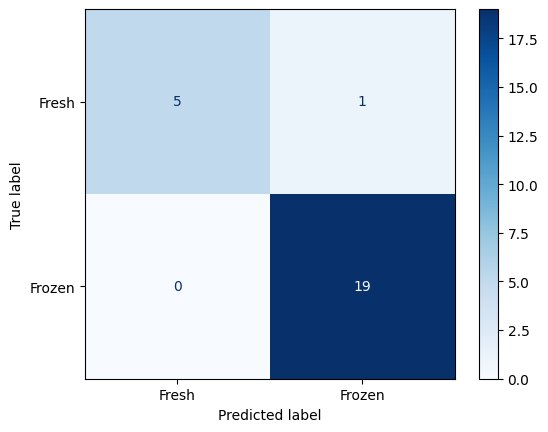

In [ ]:
# creating confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ["Fresh", "Frozen"]

cm = confusion_matrix(y_val_labels_original, predicted_labels_original)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# 3 class classification
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(labels)
y_train_categorical = to_categorical(y_train_encoded)

# Split the data into training and validation sets
x_train, x_test, y_train_cat, y_test = train_test_split(feat, y_train_categorical, test_size=0.2, random_state=15)
x_train, x_val, y_train_cat, y_val_cat = train_test_split(x_train, y_train_cat, test_size=0.25, random_state=15)

# Build the neural network model
model = Sequential()
# Classification with L a b values
#model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(64, input_dim=4096, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping criteria
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


checkpoint_path = "/content/drive/MyDrive/CorrectedAll/3Class_best_model_with_testdata3.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model with early stopping
model.fit(x_train, y_train_cat, epochs=200, batch_size=32, validation_data=(x_val, y_val_cat), callbacks=[checkpoint])


model.load_weights("/content/drive/MyDrive/CorrectedAll/3Class_best_model_with_testdata3.h5")
# Predict on the test data
predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
predicted_labels_original = label_encoder.inverse_transform(predicted_labels)

# Convert y_val_cat back to class labels
y_val_labels = np.argmax(y_test, axis=1)
y_val_labels_original = label_encoder.inverse_transform(y_val_labels)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val_labels_original, predicted_labels_original)
precision = precision_score(y_val_labels_original, predicted_labels_original, average='weighted')
recall = recall_score(y_val_labels_original, predicted_labels_original, average='weighted')
f1 = f1_score(y_val_labels_original, predicted_labels_original, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/200
1/3 [=========>....................] - ETA: 3s - loss: 1.3656 - accuracy: 0.2500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 3s 393ms/step - loss: 1.6919 - accuracy: 0.2466 - val_loss: 1.1485 - val_accuracy: 0.3200
Epoch 2/200
3/3 [==============================] - 0s 29ms/step - loss: 1.3503 - accuracy: 0.3562 - val_loss: 1.1461 - val_accuracy: 0.2800
Epoch 3/200
3/3 [==============================] - 0s 26ms/step - loss: 1.2764 - accuracy: 0.3836 - val_loss: 1.1478 - val_accuracy: 0.2800
Epoch 4/200
3/3 [==============================] - 0s 75ms/step - loss: 1.2220 - accuracy: 0.3562 - val_loss: 1.0782 - val_accuracy: 0.3600
Epoch 5/200
3/3 [==============================] - 0s 57ms/step - loss: 1.1075 - accuracy: 0.3699 - val_loss: 1.0049 - val_accuracy: 0.5600
Epoch 6/200
3/3 [==============================] - 0s 21ms/step - loss: 1.1654 - accuracy: 0.3699 - val_loss: 1.0487 - val_accuracy: 0.4800
Epoch 7/200
3/3 [==============================] - 0s 32ms/step - loss: 1.1177 - accuracy: 0.3288 - val_loss: 1.0677 - val_accuracy: 0.3200
Epoch 8/200
3/3 [==============

In [ ]:
# Predict on the test data
model.load_weights("/content/drive/MyDrive/CorrectedAll/3Class_best_model_with_testdata84.h5")

predicted_probabilities = model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
predicted_labels_original = label_encoder.inverse_transform(predicted_labels)

# Convert y_val_cat back to class labels
y_val_labels = np.argmax(y_test, axis=1)
y_val_labels_original = label_encoder.inverse_transform(y_val_labels)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val_labels_original, predicted_labels_original)
precision = precision_score(y_val_labels_original, predicted_labels_original, average='weighted')
recall = recall_score(y_val_labels_original, predicted_labels_original, average='weighted')
f1 = f1_score(y_val_labels_original, predicted_labels_original, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

1/1 [==============================] - 0s 24ms/step
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84


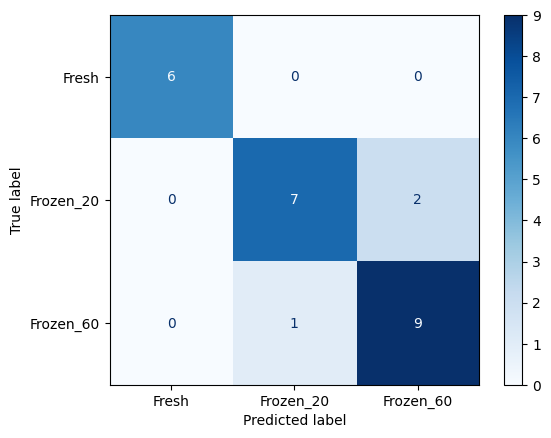

In [ ]:
# creating confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ["Fresh", "Frozen_20", "Frozen_60"]

cm = confusion_matrix(y_val_labels_original, predicted_labels_original)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

**Classification using L a b values**


1.   Fresh vs Frozen classification
2.   Right vs Left classification
3.   3 class classification

Same models are used for classification with L a b values. First layer adjusted for 3 features "model.add(Dense(64, input_dim=3, activation='relu'))"








In [ ]:
# unmeasured examples that are not included in the picture examples
df = df[df['Unnamed: 0'] != 'F60T1-302 Left FIRST']
df = df[df['Unnamed: 0'] != 'F60T1-302 Right FIRST']
df = df[df['Unnamed: 0'] != 'F60T1-802 Right FIRST']

#examples in the images with missing L value
df = df[df['Unnamed: 0'] != 'F20T1-102 Left FIRST']
df = df[df['Unnamed: 0'] != 'F20T3-202 Left THIRD']

In [ ]:
# 1- Fresh vs Frozen classification for L a b
search_string = 'fresh'
Fresh_df = df[df['Unnamed: 0'].str.contains(search_string, case=False, na=False)]
print(Fresh_df.shape)

Frozen_df = df.drop(Fresh_df.index)

selected_columns = ['Avg L', 'Avg a*', 'Avg b*']
Fresh_array = Fresh_df[selected_columns].to_numpy()
Frozen_array = Frozen_df[selected_columns].to_numpy()

print(Fresh_array.shape)
print(Frozen_array.shape)

X = np.vstack((Fresh_array, Frozen_array))
label1 = np.zeros(len(Fresh_array))
label2 = np.ones(len(Frozen_array))
Y = np.hstack((label1, label2))
X = X.astype(np.float32)

In [ ]:
# 2- Right vs Left classification for L a b
search_string = 'ight'
Right_df = df[df['Unnamed: 0'].str.contains(search_string, case=False, na=False)]

Left_df = df.drop(Right_df.index)

Right_array = Right_df[selected_columns].to_numpy()
Left_array = Left_df[selected_columns].to_numpy()

print(Right_array.shape)
print(Left_array.shape)
X = np.vstack((Right_array, Left_array))
label1 = np.zeros(len(Right_array))
label2 = np.ones(len(Left_array))
Y = np.hstack((label1, label2))
X = X.astype(np.float32)

In [ ]:
# 3 class classification with L a b values
search_string = 'F20'
F20_df = Frozen_df[Frozen_df['Unnamed: 0'].str.contains(search_string, case=False, na=False)]
F60_df = Frozen_df.drop(F20_df.index)
F20_array = F20_df[selected_columns].to_numpy()
F60_array = F60_df[selected_columns].to_numpy()
X = np.vstack((Fresh_array, F20_array, F60_array))
label1 = np.zeros(len(Fresh_array))
label2 = np.ones(len(F20_array))
label3 = np.full(len(F60_array), 2)
Y = np.hstack((label1, label2, label3))
X = X.astype(np.float32)